# MLR: CO2 Emission Prediction

## Importing the Libraries

In [108]:
import matplotlib.pyplot as plt
import pandas 
import pylab as pl
import numpy 

%matplotlib inline

## Reading the File

In [109]:
readFile = pandas.read_csv("FuelConsumptionCo2.csv")
readFile.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Dropping Unnecessary Columns

In [110]:
for column in readFile:
    if readFile[column].dtype == 'O' or column == "MODELYEAR" or column == "FUELCONSUMPTION_COMB_MPG":
        readFile = readFile.drop([column], axis=1)

readFile.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


## Plotting to Visualise Linearity

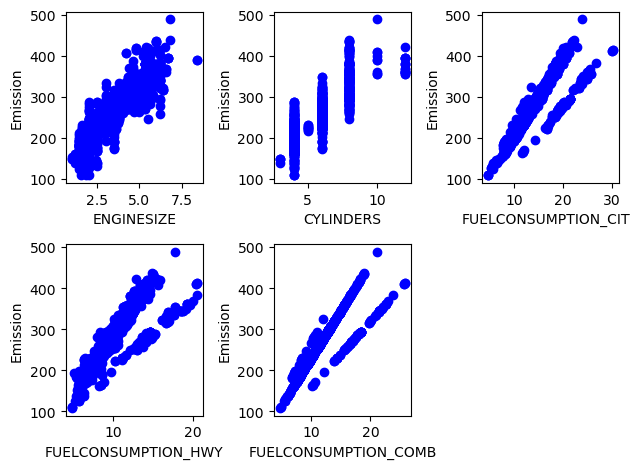

In [111]:
x = 1

for column in readFile:
    if column != label:
        plt.subplot(2, 3, x)
        plt.scatter(readFile[column], y, color='blue')
        plt.xlabel(column)
        plt.ylabel("Emission")
    
        x += 1

plt.tight_layout()
plt.show()

## Checking Multicollinearity

### Displaying Correlation Matrix

In [112]:
corr = readFile.corr()
corr

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,1.000000


As we can see, `FUELCONSUMPTION_COMB` has an unusually high correlation with both `FUELCONSUMPTION_CITY` and `FUELCONSUMPTION_HWY`, as does `FUELCONSUMPTION_HWY` with `FUELCONSUMPTION_CITY`, showing us that these 3 variables will have a very similar effect on our model, and will be repetitive if we include all.

#### Visualing the Correlation Matrix

This will help us visualise the correlation between our variables to see which ones are the most alike and will have the same effect on our model.

<Axes: >

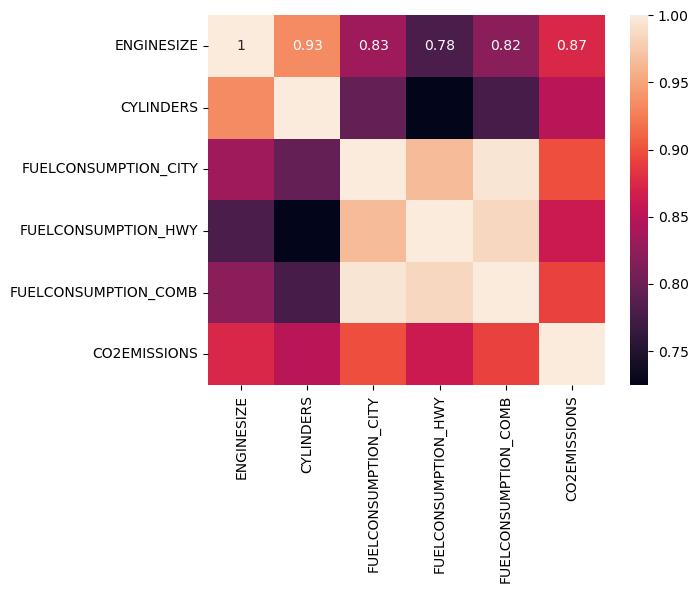

In [113]:
import seaborn as sns

sns.heatmap(corr, annot = True, xticklabels = corr.columns, yticklabels = corr.columns)

### Using VIF

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

X1 = add_constant(readFile)
series_before = pandas.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index = X1.columns)
print(series_before)

const                      29.483552
ENGINESIZE                  9.940833
CYLINDERS                   8.736138
FUELCONSUMPTION_CITY     6204.659343
FUELCONSUMPTION_HWY      1957.594920
FUELCONSUMPTION_COMB    14825.387134
CO2EMISSIONS                7.362425
dtype: float64


As we can see, `FUELCONSUMPTION_COMB`, `FUELCONSUMPTION_CITY`, and `FUELCONSUMPTION_HWY` have unusually high VIF values, and ideally, we want them all under 5. All 3 of these have a high correlation with `CO2EMISSIONS` (as we can see from our correlation matrix above), so we'll start by removing `FUELCONSUMPTION_COMB`.

Also `ENGINESIZE` and `CYLINDERS` have a similar VIF, showing us that their contribution to the model is similar. Between both of these, `CYLINDERS` has a higher impact on `CO2EMISSIONS` (as evident in the correlation matrix above), so we will remove `ENGINESIZE` as well.

In [115]:
readFile = readFile.drop(['FUELCONSUMPTION_COMB', 'ENGINESIZE'], axis = 1)

X1 = add_constant(readFile)
series_before = pandas.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index = X1.columns)
print(series_before)

const                   19.416339
CYLINDERS                4.039377
FUELCONSUMPTION_CITY    22.199328
FUELCONSUMPTION_HWY     16.357981
CO2EMISSIONS             7.032547
dtype: float64


`FUELCONSUMPTION_CITY` has the highest VIF, so we will remove it.

In [116]:
readFile = readFile.drop(['FUELCONSUMPTION_CITY'], axis = 1)

X1 = add_constant(readFile)
series_before = pandas.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index = X1.columns)
print(series_before)

const                  17.562819
CYLINDERS               3.599576
FUELCONSUMPTION_HWY     3.888303
CO2EMISSIONS            6.642319
dtype: float64


Now that the VIF values are below 5, we can continue.

## Defining Attributes and Label

In [117]:
label = "CO2EMISSIONS"

X = readFile.drop([label], axis = 1)
y = readFile[label]

## Creating Test/Train Sets

Previously, we observed that `FUELCONSUMPTION_CITY` and `FUELCONSUMPTION_COMB` gave the highest R2 score, so this time, we will train our model on both.

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Scaling our Values

In Linear Regression, it is advised that we scale our X-train-set before training our model on it as we do not want any one feature to dominate over the others. Here, I am standardising them (making mean = standard deviation = 0)

In [119]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled = pandas.DataFrame(X_train, columns=X_train.columns)

## Training Model

In [120]:
from sklearn.linear_model import LinearRegression

ml = LinearRegression().fit(X_scaled, y_train)

## Comparing Predicted Values to Actual Values

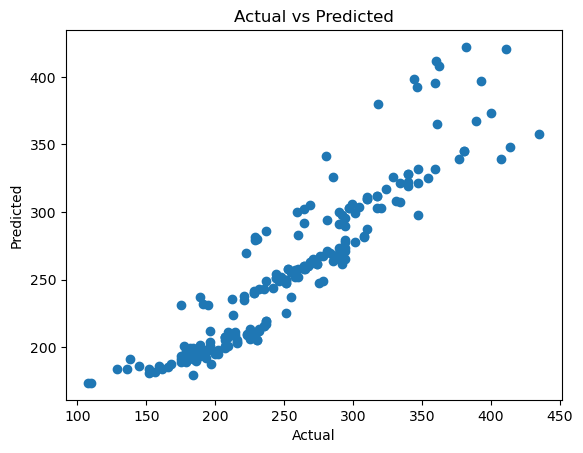

In [121]:
y_pred = ml.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## Calculating R2 Score

In [122]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8578426096924994

The R2 score has increased from `0.8184231533160797` in our Simple Linear Regression model where we trained it solely on `FUELCONSUMPTION_CITY` to `0.8578426096924994` in our Multiple Linear Regression model where we have trained it on multiple attributes.

## Conclusion

We were able to increase the accuracy of our model from a maximum of `0.8184231533160797` in Simple Linear Regression to `0.8578426096924994` in Multiple Linear Regression by training our model on all the appropriate attributes.